In [1]:
import sys
import os
import json
import re

import pandas as pd
import numpy as np

In [173]:
os.chdir(r"C:\Users\mingxi.liu\Downloads")

In [141]:
df = pd.read_excel("万科Ａ.xls", index_col=0).dropna()

In [100]:
s.resample("D", offset="9H").agg(lambda x: "。".join((x)))[-5] == ""

True

In [57]:
s_daily.index

DatetimeIndex(['2015-01-05 10:00:00', '2015-01-05 11:00:00',
               '2015-01-05 12:00:00', '2015-01-05 13:00:00',
               '2015-01-05 14:00:00', '2015-01-05 15:00:00',
               '2015-01-05 16:00:00', '2015-01-05 17:00:00',
               '2015-01-05 18:00:00', '2015-01-05 19:00:00',
               ...
               '2015-12-27 16:00:00', '2015-12-27 17:00:00',
               '2015-12-27 18:00:00', '2015-12-27 19:00:00',
               '2015-12-27 20:00:00', '2015-12-27 21:00:00',
               '2015-12-27 22:00:00', '2015-12-27 23:00:00',
               '2015-12-28 00:00:00', '2015-12-28 01:00:00'],
              dtype='datetime64[ns]', name='时间', length=8560, freq='H')

In [153]:
close_hour_news_daily = []
trading_hour_news_daily = []
for i in os.listdir():
    df = pd.read_excel(i, index_col=0).dropna()
    df.index = pd.to_datetime(df.index)
    df=df[df['来源']!="融资融券"]
    close_hour = (
        df["标题"]
        .drop_duplicates(keep="first")
        .between_time("15:00", "9:15", inclusive="both")
        .resample("D")
        .agg(lambda x: "。".join(x))
        .replace("", np.nan)
        .dropna().reset_index()
    )
    close_hour['ticker']=i[:-4]
    trading_hour=(
        df["标题"]
        .drop_duplicates(keep="first")
        .between_time("9:16", "14:59", inclusive="both")
        .resample("D")
        .agg(lambda x: "。".join(x))
        .replace("", np.nan)
        .dropna().reset_index()
    )
    trading_hour['ticker']=i[:-4]
    close_hour_news_daily.append(close_hour)
    trading_hour_news_daily.append(trading_hour)

In [157]:
trading_hour_news_daily=pd.concat(trading_hour_news_daily)

In [158]:
trading_hour_news_daily

,时间,标题,ticker
0,2015-01-05,万 科Ａ，中国神华等股票资金流速居前,万科A
1,2015-01-06,万科A：迈入2000亿销售大关 潜在受益“深港通”。万科A2014年12月销售数据点评暨最新...,万科A
2,2015-01-13,万科A:完美收官 继续前行,万科A
3,2015-01-19,万 科Ａ，顺鑫农业等股票资金流速居前,万科A
4,2015-01-23,万 科Ａ，中国重工等股票资金流速居前,万科A
...,...,...,...
44,2015-11-01,青岛海尔前三季提升高端产品占比 化解下行压力,青岛海尔
45,2015-11-02,青岛海尔——市场份额领跑，互联网转型持续推进 （华泰证券）。“空调很冷，冰箱难销”致白电行业...,青岛海尔
46,2015-11-03,"青岛海尔:营销投入侵蚀利润,期待未来新品贡献盈利。青岛海尔:为复苏的机会做好准备",青岛海尔
47,2015-11-06,"青岛海尔:业绩稍低于预期,产品结构持续优化",青岛海尔


In [183]:
open_price=pd.read_csv("cn_company_open.csv",index_col=0,parse_dates=True)

In [159]:
trading_hour_news_daily.to_csv(
    "../cn_company_news_trading_hours.csv", index=False
)

In [184]:
open_price.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)

In [185]:
open_gap=open_price/p.shift()-1

In [189]:
open_gap.count().sort_values(
    
)

国泰君安    127
中国核电    138
江苏有线    168
东方证券    193
申万宏源    228
       ... 
中国重工    488
中国船舶    488
中国联通    488
中航机载    488
青岛海尔    488
Length: 99, dtype: int64

In [190]:
open_gap_direction=pd.concat([pd.qcut(open_gap[c],q=[0,0.34,0.66,1],labels=False,duplicates='drop') for c in open_gap.columns],axis=1)

In [192]:
open_gap_direction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2014-01-02 to 2015-12-31
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   万科A     488 non-null    float64
 1   万达院线    230 non-null    float64
 2   三一重工    488 non-null    float64
 3   上汽集团    488 non-null    float64
 4   上海电气    488 non-null    float64
 5   上海莱士    488 non-null    float64
 6   上港集团    488 non-null    float64
 7   东方明珠    488 non-null    float64
 8   东方航空    488 non-null    float64
 9   东方证券    193 non-null    float64
 10  东方财富    488 non-null    float64
 11  中信证券    488 non-null    float64
 12  中信银行    488 non-null    float64
 13  中兴通讯    488 non-null    float64
 14  中国中冶    488 non-null    float64
 15  中国中车    488 non-null    float64
 16  中国中铁    488 non-null    float64
 17  中国交建    488 non-null    float64
 18  中国人寿    488 non-null    float64
 19  中国国航    488 non-null    float64
 20  中国太保    488 non-null    float64
 21  中国平安    488 non-null

In [203]:
r_for_close_unstack=open_gap_direction.shift(-1).unstack().reset_index()
r_for_close_unstack.columns=['ticker','时间','open_gap_direction']

In [204]:
close_hour_data=close_hour_data.merge(r_for_close_unstack,on=['ticker','时间'])

In [206]:
close_hour_data.to_csv('cn_data_final.csv',index=False)

<Axes: >

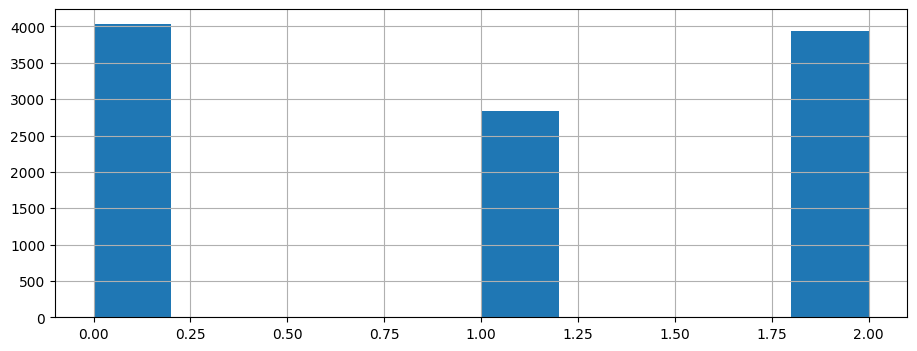

In [199]:
close_hour_data['open_gap'].hist()

In [145]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2")
model = AutoModelForSequenceClassification.from_pretrained("hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2")

时间
2015-01-05                      万科A：2014年实现销售金额2151.3亿元同比增25.9%
2015-01-06                           万科A:2014年十二月份销售及近期新增项目情况简报
2015-01-07    万科A　潜在受益“深港通”。万科A12月份销售点评:销售表现靓丽,获益集中度跳增。万科A12...
2015-01-08                                   万 科Ａ，西部证券等股票资金流速居前
2015-01-09                                   万 科Ａ，上工申贝等股票资金流速居前
                                    ...                        
2015-12-20                                  万科A:最晚于2016年1月18日复牌
2015-12-21    万科A:销售表现强劲,继续增大拿地力度。万科A股东之争引发机构减筹 富国与南方基金15天浮盈...
2015-12-22    万科A：独立董事海闻辞职。万科A独董海闻因个人原因辞职。万科A独董海闻因个人原因辞职。万科A...
2015-12-25                                    万科A：管理层希望获得所有股东支持
2015-12-28                      万科(02202.HK)股东钜盛华吸A股 持股增至24.26%
Name: 标题, Length: 93, dtype: object

In [146]:
df["标题"].drop_duplicates(keep="first")

时间
2015-01-05 10:14:00                              万 科Ａ，中国神华等股票资金流速居前
2015-01-05 20:33:00                 万科A：2014年实现销售金额2151.3亿元同比增25.9%
2015-01-06 07:36:00                      万科A:2014年十二月份销售及近期新增项目情况简报
2015-01-06 14:21:00                       万科A：迈入2000亿销售大关 潜在受益“深港通”
2015-01-06 14:49:00    万科A2014年12月销售数据点评暨最新观点:2014上演完美收官,2015辉煌有望再续
                                           ...                     
2015-12-22 19:48:00                                  万科A独董海闻因个人原因辞职
2015-12-22 22:25:00                       万科A流通股权或不足24.08% 独董请辞后院难安
2015-12-25 11:20:00                                     万科A独立董事海闻辞职
2015-12-25 20:49:00                               万科A：管理层希望获得所有股东支持
2015-12-28 01:05:00                 万科(02202.HK)股东钜盛华吸A股 持股增至24.26%
Name: 标题, Length: 294, dtype: object

In [207]:
df=dt.read_clip()

In [359]:
s=np.log(df['stock'].ffill())

In [330]:
signals=[]
for i in range(5,121,5):
    # signal=np.sign(s.ewm(span=i).mean()-s.ewm(span=i*3).mean())
    signal=np.sign(s.diff(i))

    signals.append((signal.shift(1)).rename(str(i)))
signals=pd.concat(signals,axis=1)

In [331]:
pd.concat(r,axis=1)[:'2020-7'].mean().sort_values(ascending=False)

10     0.000721
30     0.000467
35     0.000387
15     0.000381
45     0.000379
20     0.000374
50     0.000246
25     0.000238
55     0.000154
60     0.000124
5      0.000100
40     0.000022
65    -0.000230
95    -0.000424
75    -0.000481
90    -0.000512
70    -0.000568
85    -0.000700
100   -0.000743
80    -0.000750
105   -0.001002
115   -0.001006
110   -0.001038
120   -0.001039
dtype: float64

In [332]:
(signals.mul(s.diff(),axis=0))[:'2020-7'].mean().sort_values(ascending=False)

10     0.000721
30     0.000467
35     0.000387
15     0.000381
45     0.000379
20     0.000374
50     0.000246
25     0.000238
55     0.000154
60     0.000124
5      0.000100
40     0.000022
65    -0.000230
95    -0.000424
75    -0.000481
90    -0.000512
70    -0.000568
85    -0.000700
100   -0.000743
80    -0.000750
105   -0.001002
115   -0.001006
110   -0.001038
120   -0.001039
dtype: float64

<Axes: xlabel='Date'>

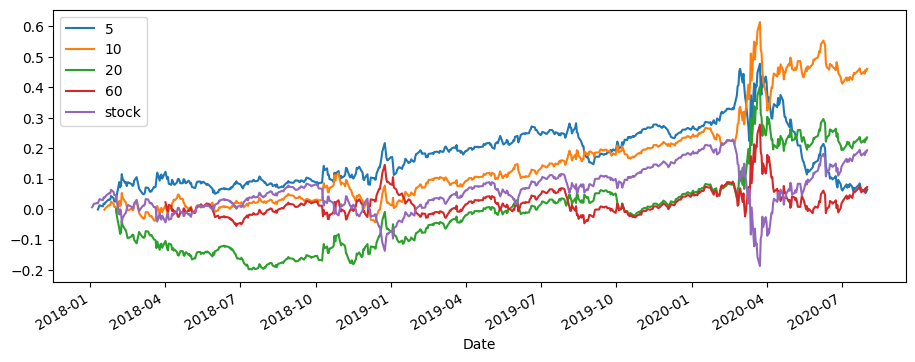

In [333]:
pd.concat(r+[s.diff()],axis=1)[['5','10','20','60','stock']].cumsum()[:"2020-7"].plot()

In [335]:
tech_signal=signals['10']

In [272]:
nlp_pretrain=dt.read_clip()

In [275]:
nlp_pretrain['Time']=pd.to_datetime(nlp_pretrain['Time'])

In [277]:
nlp_pretrain_signal=nlp_pretrain.groupby('Time').mean()

In [283]:
nlp_pretrain_signal['sent']-=1

In [302]:
nlp_pretrain_signal=nlp_pretrain_signal.shift(1)

In [360]:
dt.to_clip(np.sign(nlp_pretrain_signal['prob_diff']))

In [366]:
nlp_signal=np.sign(nlp_pretrain_signal['prob_diff'])

In [350]:
nlp_signal[:round(len(nlp_signal)*0.8)]

Time
2018-03-20    NaN
2018-03-21    0.0
2018-03-22    0.0
2018-03-23   -1.0
2018-03-24    0.0
             ... 
2020-01-26    1.0
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
Name: sent, Length: 682, dtype: float64

In [367]:
combine_signal=tech_signal+nlp_signal

<Axes: >

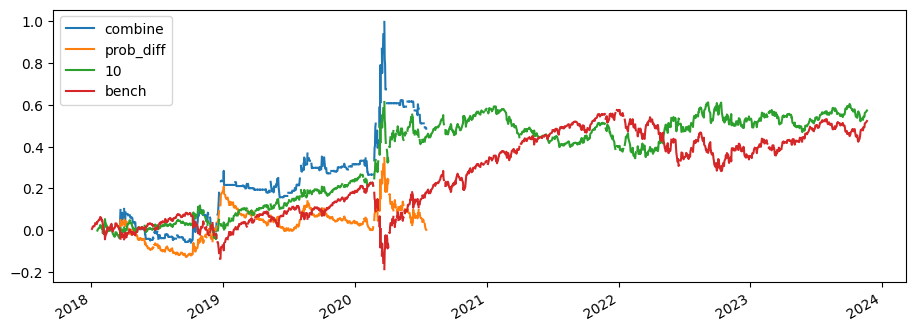

In [373]:
all_signals=pd.concat([combine_signal.rename('combine'),nlp_signal,tech_signal,],axis=1)
all_signals['bench']=1
all_signals.mul(s.diff(),axis=0).cumsum().plot()

In [362]:
fine_tuned=dt.read_clip()

In [374]:
final_all_signals=pd.concat([all_signals,fine_tuned],axis=1)

In [379]:
dt.to_clip(final_all_signals.mul(s.diff(),axis=0).dropna())

<Axes: >

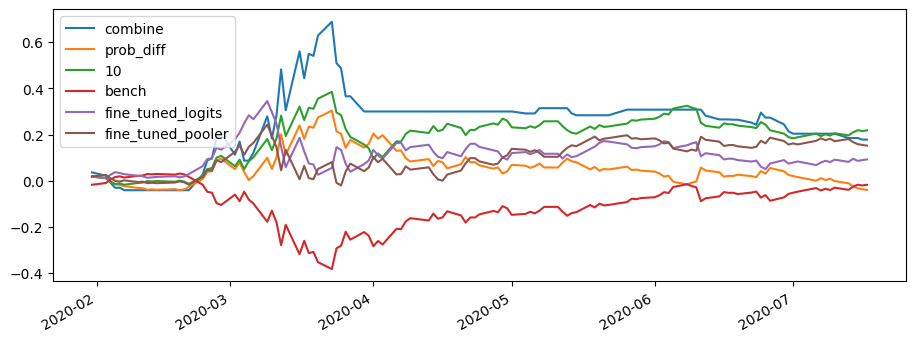

In [377]:
final_all_signals.mul(s.diff(),axis=0)['2020-1-30':'2020-7-20'].dropna()

In [371]:
all_signals

,combine,prob_diff,10,bench,fine_tuned_logits,fine_tuned_pooler
2018-03-21,-2.0,-1.0,-1.0,1.0,NaN,NaN
2018-03-22,-2.0,-1.0,-1.0,1.0,NaN,NaN
2018-03-23,-2.0,-1.0,-1.0,1.0,NaN,NaN
2018-03-26,-2.0,-1.0,-1.0,1.0,NaN,NaN
2018-03-27,-2.0,-1.0,-1.0,1.0,NaN,NaN
...,...,...,...,...,...,...
2020-07-14,0.0,-1.0,1.0,1.0,1.0,-1.0
2020-07-15,0.0,-1.0,1.0,1.0,-1.0,-1.0
2020-07-16,2.0,1.0,1.0,1.0,-1.0,1.0
2020-07-17,0.0,-1.0,1.0,1.0,1.0,-1.0


In [383]:
returns=dt.read_clip()

In [384]:
returns.mean()/returns.std()*252**0.5

bench               -0.081117
pretrained          -0.179510
fine_tuned_logits    0.411982
fine_tuned_pooler    0.680905
dtype: float64

In [3]:
def clean(tweet):
    # tweet = re.sub(r'http\S+|www\S+|@\S+|#\S+|[^A-Za-z\s]', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub("(@[A-Za-z]+[A-Za-z0-9-_]+)", "", tweet)
    tweet = re.sub(r"#(\w+)", "", tweet)
    tweet = re.sub("([_]+)", "", tweet)
    if not re.search(r'[.,!?;:"]$', tweet[-1]):
        tweet += ". "
    return tweet

In [4]:
def extract(ticker, date):
    data = ""
    with open(f"{ticker}/{date}") as f:
        for line in f:
            j = json.loads(line)
            if not "retweeted_status" in j:
                data += clean(j["text"])
    return data

In [5]:
def extract_ticker_all(ticker):
    data = []
    for date in os.listdir(ticker):
        data.append((date, extract(ticker, date)))
    return pd.DataFrame(data, columns=["date", "tweets"])

In [67]:
for ticker in os.listdir()[2:]:
    data = extract_ticker_all(ticker)
    data.to_csv(f"../clean/{ticker}.csv", index=False)

In [68]:
pd.read_csv("../clean/SLB.csv")

,date,tweets
0,2014-01-02,Not as diversified as $SLB (think $HAL is muc...
1,2014-01-07,$SLB call at $94.50ish was perfect…haven't tri...
2,2014-01-11,S&amp;P100 Performance $BHI $BMY $AEP $SLB $L...
3,2014-01-12,$SLB - China Believes that it Can Duplicate Ou...
4,2014-01-15,Wow. Great on $CCRN $WTI $SLB $VALE Click .
...,...,...
311,2016-03-25,-Cameron deal clears final regulatory hurdle. ...
312,2016-03-27,$SLB:\n\nKey Stocks of the Day: Schlumberger L...
313,2016-03-28,BRIEF-Cameron expresses no opinion on debt ten...
314,2016-03-30,"Limited. Given ""Buy"" Rating at Citigroup Inc...."


In [14]:
os.chdir(
    r"C:\Users\mingxi.liu\OneDrive - Dymon Asia Capital (Singapore) Pte Ltd\MIDS\W266\stocknet-dataset"
)

In [4]:
data_all = []
for i in os.listdir():
    data_all.append(
        pd.read_csv(i, index_col=0, parse_dates=True)["Adj Close"].rename(i[:-4])
    )
p = pd.concat(data_all, axis=1)

In [5]:
p.tail()

,AAPL,ABB,ABBV,AEP,AGFS,AMGN,AMZN,BA,BABA,BAC,...,UL,UN,UNH,UPS,UTX,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-28,161.470001,23.07,73.320000,74.099998,7.05,171.779999,946.020020,237.179993,168.300003,23.599287,...,58.119999,59.470001,195.089996,113.790001,115.330002,103.779999,48.610001,51.630001,78.029999,76.470001
2017-08-29,162.910004,22.92,73.889999,73.940002,7.02,172.229996,954.059998,240.490005,167.410004,23.460001,...,58.119999,59.490002,196.729996,114.889999,118.699997,103.769997,48.509998,51.419998,78.769997,76.449997
2017-08-30,163.350006,22.84,73.919998,73.750000,7.03,173.649994,967.590027,240.460007,171.250000,23.870001,...,57.639999,59.020000,195.880005,114.970001,119.599998,103.730003,48.119999,51.360001,78.540001,76.099998
2017-08-31,164.000000,23.18,75.300003,73.629997,7.12,177.770004,980.599976,239.660004,171.740005,23.889999,...,58.209999,59.500000,198.899994,114.360001,119.720001,103.519997,47.970001,51.070000,78.070000,76.330002
2017-09-01,164.050003,23.26,75.419998,73.540001,7.16,178.710007,978.250000,240.330002,171.039993,24.090000,...,58.290001,59.540001,199.750000,114.389999,117.919998,103.900002,47.919998,50.970001,78.370003,76.570000


In [8]:
r_now = np.log(p).diff()["2014":"2015"]
r_next = np.log(p).diff(2).shift(-2)["2014":"2015"]

In [10]:
def zscore(data):
    return (data - data.mean()) / data.std()

In [12]:
r_now = zscore(r_now)
r_next = zscore(r_next)

In [108]:
r = np.log(p).diff(2).shift(-2)["2014":"2015"]

In [109]:
upper = r.quantile(0.66)
lower = r.quantile(0.33)

In [110]:
labels = r.copy()

In [111]:
labels[labels > upper] = 200
labels[labels < lower] = -200
labels[(labels <= upper) & (labels >= lower)] = 0

In [112]:
labels = labels.replace(0, 1).replace(-200, 0).replace(200, 2)

In [113]:
labels.to_csv("price\clean\labels_next2day.csv")

In [97]:
os.chdir("..")

In [98]:
os.getcwd()

'C:\\Users\\mingxi.liu\\OneDrive - Dymon Asia Capital (Singapore) Pte Ltd\\MIDS\\W266\\stocknet-dataset'

In [100]:
pd.read_csv("tweet\clean\AAPL.csv")

,date,tweets
0,2014-01-01,iTV Will Boost Apple $AAPL . users are more ...
1,2014-01-02,$AAPL - Wall St. kicks off New Year on lower n...
2,2014-01-03,The Five-Year-Old iPad: When Will People Stop ...
3,2014-01-04,$AAPL - Boeing contract with machinists - deta...
4,2014-01-05,$AAPL Machinists vote helps Boeing avoid hirin...
...,...,...
779,2016-03-27,Here's how much money Apple makes when you buy...
780,2016-03-28,$VDRM HUGE FILING OUT REVENUES! 1000% run i...
781,2016-03-29,$AAPL Facebook hints at possible Apple Pay tea...
782,2016-03-30,"Top Gainers at Dow: Apple (NASDAQ:AAPL), Micro..."


In [16]:
def match_text_label(ticker, labels_current, labels_next, r_now, r_next):
    try:
        tweets = pd.read_csv(f"tweet/clean/{ticker}.csv", index_col=0, parse_dates=True)
    except FileNotFoundError:
        return
    pairs = pd.concat(
        [
            tweets,
            labels_current[ticker].rename("cls_now"),
            labels_next[ticker].rename("cls_next"),
            r_now[ticker].rename("reg_now"),
            r_next[ticker].rename("reg_next"),
        ],
        axis=1,
    )
    pairs["ticker"] = ticker
    return pairs.reset_index()

In [15]:
labels_current = pd.read_csv(
    "price/clean/labels_current.csv", parse_dates=True, index_col=0
)
labels_next = pd.read_csv(
    "price/clean/labels_next2day.csv", parse_dates=True, index_col=0
)

In [18]:
pairs = pd.concat(
    [
        match_text_label(t, labels_current, labels_next, r_now, r_next)
        for t in labels_current.columns
    ]
)

In [22]:
pairs.tail()

,date,tweets,cls_now,cls_next,reg_now,reg_next,ticker
709,2016-03-25,$XOM Analysts Ratings on Exxon Mobil Corporati...,NaN,NaN,NaN,NaN,XOM
710,2016-03-28,Dow Trend $GE $MMM $UNH $TRV $WMT $JNJ $KO $I...,NaN,NaN,NaN,NaN,XOM
711,2016-03-29,$XOM:\n\nExxon Mobil – The Turnaround Has Begu...,NaN,NaN,NaN,NaN,XOM
712,2016-03-30,NEW POST: Proving Oil's Guilt $DWTI $SPY $USO...,NaN,NaN,NaN,NaN,XOM
713,2016-03-31,$XOM Shares in Focus: Exxon Mobil Corporation ...,NaN,NaN,NaN,NaN,XOM


In [21]:
pairs.columns = [
    "date",
    "tweets",
    "cls_now",
    "cls_next",
    "reg_now",
    "reg_next",
    "ticker",
]

In [24]:
pairs.dropna().to_csv("clean_data.csv", index=False)

In [136]:
pd.read_csv("clean_data.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     18359 non-null  object 
 1   tweets   18359 non-null  object 
 2   current  18359 non-null  float64
 3   next     18359 non-null  float64
 4   ticker   18359 non-null  object 
dtypes: float64(2), object(3)
memory usage: 717.3+ KB
